### Multi-layer Perceptron Exercise
#### In this exercise, we will implement the multi-perceptron algorithm with two hidden layers. 
#### The implementation of the MLP algorithm will be in the mlp.py file but you will test your implementation 
#### in this notebook. In this exercise we will use the MNIST dataset that we used for week 2 lab (KNN). 

In [13]:
# importing the MLP algorithm from mlp.py file 
# where you will implement the MLP algorithm 
from mlp import MLP 
import numpy as np

# This is to reload all changed modules every time before executing a new line.
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# loading the MNIST datatset
import pickle, gzip

f = gzip.open('mnist.pkl.gz','rb')
tset, vset, teset = pickle.load(f, encoding='latin1')
print(tset[0].shape, vset[0].shape, teset[0].shape)
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'mnist.pkl.gz'

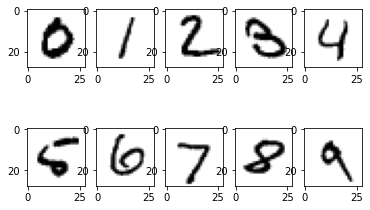

In [15]:
import matplotlib.pyplot as plt # To install: pip install matplotlib

# visualise some examples from the dataset 
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    im_idx = np.argwhere(teset[1] == i)[0]
    plottable_image = np.reshape(teset[0][im_idx], (28, 28))
    ax.imshow(plottable_image, cmap='gray_r')

In [16]:
# we will use only 9000 images for training and 1000 for testing 

# Just use the first 9000 images for training 
tread = 9000
train_in = tset[0][:tread,:]

# This is a little bit of work -- 1 of N encoding
# Make sure you understand how it does it
train_tgt = np.zeros((tread,10))
for i in range(tread):
    train_tgt[i,tset[1][i]] = 1

# and use 1000 images for testing
teread = 1000
test_in = teset[0][:teread,:]
test_tgt = np.zeros((teread,10))
for i in range(teread):
    test_tgt[i,teset[1][i]] = 1

#### Initialise the MLP classifier 

In [17]:
# We choose the first and second hidden layers to have 5 neurons each.
sizes = [784,5,5,10] # 784 is the number of pixels of the images and 10 is the number of classes 
classifier = MLP(sizes)

In [18]:
# TODO: open the mlp.py file and implement self.forwardPass and self.train methods
# test your implementation here 
# for now, let's keep the learning rate and the number of iterations unchanged  
from mlp import MLP
classifier.train(train_in, train_tgt, 0.001, 1000)

Iteration:  0  Error:  4110.322575537211 errorDif: 4110.322575537211


KeyboardInterrupt: 

In [ ]:
# we evaluate our model on the testing set 
# and show the confusion matrix and the accuracy
classifier.evaluate(test_in, test_tgt)

In [77]:
# you should expect the accuracy to be really low ~ most likely less than %50
# I think we can do better by experimenting with different learning rate and 
# number of neurons in each hidden layer. 

In [108]:
# TODO: modify the network parameters to get the test accuracy above %90 
# you can change the learning rate, the number of neurons of each hidden layer
# and number of iterations. You can also implement the gradient descent algorithm
# with momentum and experiment it with different momentum values.
from mlp import MLP
best_sizes = [784,100,100,10]        #[784,5,5,10]#[784,10,10,10]
best_beta = 1.2                #1 0.75
best_momentum = 0.95       #0.9
best_lr = 0.0002 # best learning rate #0.1
best_niterations = 6000         #1000 #19200
newClass = MLP(sizes = best_sizes, beta=best_beta, momentum=best_momentum)
newClass.train(train_in, train_tgt, best_lr, best_niterations)
newClass.evaluate(test_in, test_tgt)

Iteration:  0  Error:  4080.9857218993757 errorDif: 4080.9857218993757
Iteration:  25  Error:  4060.7260041945906 errorDif: -20.25971770478509
Iteration:  50  Error:  4043.6655357170544 errorDif: -17.060468477536233
Iteration:  75  Error:  4038.0363757501905 errorDif: -5.629159966863881
Iteration:  100  Error:  4032.2524546282793 errorDif: -5.783921121911135
Iteration:  125  Error:  4021.831186089911 errorDif: -10.421268538368167
Iteration:  150  Error:  4007.7495977106673 errorDif: -14.08158837924384
Iteration:  175  Error:  3985.129957035045 errorDif: -22.619640675622122
Iteration:  200  Error:  3941.988902646751 errorDif: -43.14105438829438
Iteration:  225  Error:  3846.433282707389 errorDif: -95.5556199393618
Iteration:  250  Error:  3647.524125236217 errorDif: -198.90915747117197
Iteration:  275  Error:  3423.7698256124804 errorDif: -223.75429962373664
Iteration:  300  Error:  3225.1710136282527 errorDif: -198.59881198422772
Iteration:  325  Error:  2989.570099886179 errorDif: -23

Iteration:  2800  Error:  178.35528151358812 errorDif: -2.2163991742960434
Iteration:  2825  Error:  175.01680954229 errorDif: -3.3384719712981337
Iteration:  2850  Error:  173.08086407998888 errorDif: -1.935945462301106
Iteration:  2875  Error:  171.849242658879 errorDif: -1.2316214211098782
Iteration:  2900  Error:  169.2453208513941 errorDif: -2.603921807484909
Iteration:  2925  Error:  166.67478187545237 errorDif: -2.57053897594173
Iteration:  2950  Error:  165.35293058418162 errorDif: -1.3218512912707467
Iteration:  2975  Error:  163.5352713912766 errorDif: -1.8176591929050119
Iteration:  3000  Error:  160.99579494709386 errorDif: -2.5394764441827533
Iteration:  3025  Error:  159.30471032834976 errorDif: -1.6910846187440995
Iteration:  3050  Error:  157.8253151475598 errorDif: -1.4793951807899646
Iteration:  3075  Error:  155.61417265879388 errorDif: -2.2111424887659155
Iteration:  3100  Error:  153.71925529966984 errorDif: -1.8949173591240367
Iteration:  3125  Error:  152.2899829

Iteration:  5575  Error:  66.9672624424737 errorDif: -0.3424241945350417
Iteration:  5600  Error:  66.63010261118755 errorDif: -0.3371598312861437
Iteration:  5625  Error:  66.29803113961265 errorDif: -0.33207147157490624
Iteration:  5650  Error:  65.97093079283839 errorDif: -0.3271003467742588
Iteration:  5675  Error:  65.64867810278867 errorDif: -0.3222526900497229
Iteration:  5700  Error:  65.33108019924623 errorDif: -0.3175979035424348
Iteration:  5725  Error:  65.01782523086226 errorDif: -0.3132549683839727
Iteration:  5750  Error:  64.70845311920688 errorDif: -0.30937211165537803
Iteration:  5775  Error:  64.40234646545706 errorDif: -0.30610665374982204
Iteration:  5800  Error:  64.09873709136767 errorDif: -0.30360937408939037
Iteration:  5825  Error:  63.7967240492403 errorDif: -0.30201304212737057
Iteration:  5850  Error:  63.49530312413307 errorDif: -0.30142092510722307
Iteration:  5875  Error:  63.193413260157584 errorDif: -0.30188986397548945
Iteration:  5900  Error:  62.890

93.89999999999999

Iteration:  0  Error:  4063.9024823911323 errorDif: 4063.9024823911323
Iteration:  25  Error:  4052.2906823963995 errorDif: -11.611799994732792
Iteration:  50  Error:  4042.5333451598935 errorDif: -9.757337236505919
Iteration:  75  Error:  4037.1172126713345 errorDif: -5.416132488559015
Iteration:  100  Error:  4030.382737392767 errorDif: -6.7344752785675155
Iteration:  125  Error:  4021.486726255933 errorDif: -8.896011136834204
Iteration:  150  Error:  4007.714523634734 errorDif: -13.77220262119863
Iteration:  175  Error:  3986.1541226202 errorDif: -21.560401014534364
Iteration:  200  Error:  3946.7868163849244 errorDif: -39.367306235275464
Iteration:  225  Error:  3862.867612727726 errorDif: -83.91920365719852
Iteration:  250  Error:  3679.890923604329 errorDif: -182.97668912339668
Iteration:  275  Error:  3449.8324106152168 errorDif: -230.0585129891124
Iteration:  300  Error:  3219.1257722179494 errorDif: -230.7066383972674
Iteration:  325  Error:  2940.851972280094 errorDif: -278.2

Iteration:  2800  Error:  182.7552956846979 errorDif: -2.340167671878362
Iteration:  2825  Error:  180.53310767666864 errorDif: -2.2221880080292635
Iteration:  2850  Error:  178.3488545720699 errorDif: -2.1842531045987243
Iteration:  2875  Error:  176.16128936304042 errorDif: -2.1875652090294864
Iteration:  2900  Error:  174.05479612162208 errorDif: -2.106493241418349
Iteration:  2925  Error:  172.0166704628129 errorDif: -2.0381256588091787
Iteration:  2950  Error:  169.98215484160895 errorDif: -2.0345156212039512
Iteration:  2975  Error:  167.99377743767897 errorDif: -1.9883774039299738
Iteration:  3000  Error:  166.07642408157474 errorDif: -1.917353356104229
Iteration:  3025  Error:  164.17954998698104 errorDif: -1.8968740945936986
Iteration:  3050  Error:  162.31245842432162 errorDif: -1.867091562659425
Iteration:  3075  Error:  160.51156070216155 errorDif: -1.800897722160073
Iteration:  3100  Error:  158.7515416286646 errorDif: -1.7600190734969487
Iteration:  3125  Error:  157.0256

Iteration:  5575  Error:  80.77133555383479 errorDif: -0.3544608538512364
Iteration:  5600  Error:  80.43598024243053 errorDif: -0.3353553114042569
Iteration:  5625  Error:  80.11700821423157 errorDif: -0.31897202819895654
Iteration:  5650  Error:  79.81183331654138 errorDif: -0.30517489769019335
Iteration:  5675  Error:  79.51850407511134 errorDif: -0.2933292414300439
Iteration:  5700  Error:  79.2356092125215 errorDif: -0.282894862589842
Iteration:  5725  Error:  78.96210663302705 errorDif: -0.2735025794944477
Iteration:  5750  Error:  78.6971984322606 errorDif: -0.26490820076644184
Iteration:  5775  Error:  78.44025034519987 errorDif: -0.256948087060735
Iteration:  5800  Error:  78.19073955595259 errorDif: -0.24951078924728165
Iteration:  5825  Error:  77.94821980976955 errorDif: -0.24251974618303507
Iteration:  5850  Error:  77.712297365247 errorDif: -0.23592244452255784
Iteration:  5875  Error:  77.4826140798819 errorDif: -0.2296832853650983
Iteration:  5900  Error:  77.2588354231

Iteration:  2175  Error:  249.26348690476019 errorDif: -3.4154541730314065
Iteration:  2200  Error:  245.92080661093382 errorDif: -3.342680293826362
Iteration:  2225  Error:  242.64871941826613 errorDif: -3.2720871926676978
Iteration:  2250  Error:  239.4447130089117 errorDif: -3.2040064093544345
Iteration:  2275  Error:  236.31045190112843 errorDif: -3.13426110778326
Iteration:  2300  Error:  233.24214494638943 errorDif: -3.0683069547390005
Iteration:  2325  Error:  230.23686541169207 errorDif: -3.0052795346973653
Iteration:  2350  Error:  227.29322050153766 errorDif: -2.943644910154404
Iteration:  2375  Error:  224.4065782412688 errorDif: -2.8866422602688715
Iteration:  2400  Error:  221.57396268877324 errorDif: -2.832615552495554
Iteration:  2425  Error:  218.79270182682384 errorDif: -2.7812608619493915
Iteration:  2450  Error:  216.0589164741594 errorDif: -2.733785352664455
Iteration:  2475  Error:  213.37017512424086 errorDif: -2.68874134991853
Iteration:  2500  Error:  210.723512

Iteration:  4950  Error:  82.1678960971351 errorDif: -0.4892900927910233
Iteration:  4975  Error:  81.68941820669524 errorDif: -0.4784778904398621
Iteration:  5000  Error:  81.2208884814318 errorDif: -0.46852972526343706
Iteration:  5025  Error:  80.76132192413361 errorDif: -0.4595665572981886
Iteration:  5050  Error:  80.3096494050501 errorDif: -0.451672519083516
Iteration:  5075  Error:  79.86473360214332 errorDif: -0.44491580290677746
Iteration:  5100  Error:  79.42536674505561 errorDif: -0.4393668570877054
Iteration:  5125  Error:  78.990254116214 errorDif: -0.4351126288416083
Iteration:  5150  Error:  78.55798698872869 errorDif: -0.4322671274853178
Iteration:  5175  Error:  78.12701013823346 errorDif: -0.4309768504952274
Iteration:  5200  Error:  77.69559616100831 errorDif: -0.43141397722514796
Iteration:  5225  Error:  77.2618564571555 errorDif: -0.43373970385280813
Iteration:  5250  Error:  76.82384806779166 errorDif: -0.43800838936384423
Iteration:  5275  Error:  76.37985406145

Iteration:  1550  Error:  362.5551881952515 errorDif: -0.5838319163745496
Iteration:  1575  Error:  357.948011871098 errorDif: -4.6071763241534995
Iteration:  1600  Error:  348.9656807066679 errorDif: -8.982331164430093
Iteration:  1625  Error:  343.18271586114406 errorDif: -5.78296484552385
Iteration:  1650  Error:  340.5917305953657 errorDif: -2.590985265778386
Iteration:  1675  Error:  336.42537732881914 errorDif: -4.166353266546537
Iteration:  1700  Error:  330.515010978128 errorDif: -5.910366350691163
Iteration:  1725  Error:  324.56885514505416 errorDif: -5.946155833073817
Iteration:  1750  Error:  319.7430017743463 errorDif: -4.8258533707078755
Iteration:  1775  Error:  316.5623040322728 errorDif: -3.180697742073505
Iteration:  1800  Error:  313.1091850787294 errorDif: -3.453118953543367
Iteration:  1825  Error:  307.1262654963384 errorDif: -5.982919582390991
Iteration:  1850  Error:  300.7970135487658 errorDif: -6.329251947572629
Iteration:  1875  Error:  297.9867994394413 erro

Iteration:  4325  Error:  99.31814307703705 errorDif: -0.7857982806848298
Iteration:  4350  Error:  98.54250506451898 errorDif: -0.7756380125180726
Iteration:  4375  Error:  97.7795590166401 errorDif: -0.7629460478788701
Iteration:  4400  Error:  97.03242697264528 errorDif: -0.7471320439948244
Iteration:  4425  Error:  96.30343505116296 errorDif: -0.7289919214823186
Iteration:  4450  Error:  95.59318418736636 errorDif: -0.7102508637966025
Iteration:  4475  Error:  94.90075546952228 errorDif: -0.6924287178440807
Iteration:  4500  Error:  94.22452962657087 errorDif: -0.6762258429514105
Iteration:  4525  Error:  93.56286793869077 errorDif: -0.6616616878800983
Iteration:  4550  Error:  92.9144175801506 errorDif: -0.648450358540174
Iteration:  4575  Error:  92.27818224161072 errorDif: -0.6362353385398762
Iteration:  4600  Error:  91.65352187016006 errorDif: -0.6246603714506591
Iteration:  4625  Error:  91.04015697872988 errorDif: -0.6133648914301801
Iteration:  4650  Error:  90.438151740030

MemoryError: Unable to allocate 6.94 MiB for an array with shape (9000, 101) and data type float64

The confusion matrix is:
[[ 83.   0.   0.   0.   1.   1.   3.   0.   0.   0.]
 [  0. 126.   0.   0.   1.   0.   0.   2.   0.   0.]
 [  0.   0. 108.   2.   2.   0.   2.   3.   3.   0.]
 [  0.   0.   1. 103.   0.   3.   0.   0.   3.   0.]
 [  0.   0.   1.   0. 100.   0.   1.   1.   2.   3.]
 [  0.   0.   0.   1.   0.  77.   1.   0.   1.   2.]
 [  1.   0.   0.   0.   1.   1.  80.   0.   0.   0.]
 [  1.   0.   4.   1.   0.   2.   0.  92.   1.   2.]
 [  0.   0.   2.   0.   1.   2.   0.   0.  79.   1.]
 [  0.   0.   0.   0.   4.   1.   0.   1.   0.  86.]]
The accuracy is  93.4


93.4

SyntaxError: invalid syntax (<ipython-input-20-a37ee65f84d1>, line 1)

In [109]:
#best_sizes = None
#best_beta = None
#best_momentum = None
#best_lr = None # best learning rate
#best_niterations = None
#best_classifier = MLP(sizes = best_sizes, beta=best_beta, momentum=best_momentum)
#best_classifier.train(train_in, train_tgt, best_lr, best_niterations)
best_classifier = newClass#newClass
best_classifier.evaluate(test_in, test_tgt)

The confusion matrix is:
[[ 81.   0.   0.   0.   0.   1.   3.   0.   0.   0.]
 [  0. 125.   0.   0.   0.   0.   0.   2.   0.   0.]
 [  1.   0. 109.   1.   2.   0.   1.   2.   3.   0.]
 [  0.   0.   0. 103.   0.   1.   0.   0.   3.   1.]
 [  0.   0.   1.   0. 101.   0.   1.   1.   1.   2.]
 [  0.   0.   0.   1.   0.  80.   1.   0.   1.   0.]
 [  1.   0.   0.   1.   2.   1.  81.   0.   0.   0.]
 [  1.   0.   4.   1.   0.   1.   0.  93.   1.   3.]
 [  0.   1.   2.   0.   1.   2.   0.   0.  79.   1.]
 [  1.   0.   0.   0.   4.   1.   0.   1.   1.  87.]]
The accuracy is  93.89999999999999


93.89999999999999

In [110]:
# TODO: run the following code to save the best parameters and 
# the weights of the network that achieves the desired accuracy
best_parameters = {
    'sizes': best_sizes,
    'beta': best_beta,
    'momentum': best_momentum,
    'lr': best_lr,
    'niterations': best_niterations,
    'weights_1': best_classifier.weights1,
    'weights_2': best_classifier.weights2,
    'weights_3': best_classifier.weights3,
}

with open('best_classifier.pkl', 'wb') as handle:
    pickle.dump(best_parameters, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
with open('best_classifier.pkl', 'rb') as f:
    data = pickle.load(f)

In [12]:
data
classN = MLP(sizes = data['sizes'], beta=data['beta'], momentum=data['momentum'])
classN.weights1 = data['weights_1']
classN.weights2 = data['weights_2']
classN.weights3 = data['weights_3']
classN.evaluate(test_in, test_tgt)

The confusion matrix is:
[[ 81.   0.   0.   0.   0.   1.   3.   0.   0.   0.]
 [  0. 125.   0.   0.   0.   0.   0.   2.   0.   0.]
 [  1.   0. 109.   1.   2.   0.   1.   2.   3.   0.]
 [  0.   0.   0. 103.   0.   1.   0.   0.   3.   1.]
 [  0.   0.   1.   0. 101.   0.   1.   1.   1.   2.]
 [  0.   0.   0.   1.   0.  80.   1.   0.   1.   0.]
 [  1.   0.   0.   1.   2.   1.  81.   0.   0.   0.]
 [  1.   0.   4.   1.   0.   1.   0.  93.   1.   3.]
 [  0.   1.   2.   0.   1.   2.   0.   0.  79.   1.]
 [  1.   0.   0.   0.   4.   1.   0.   1.   1.  87.]]
The accuracy is  93.89999999999999
